Before you begin, execute this cell to import numpy and packages from the D-Wave Ocean suite, and all necessary functions for the gate-model framework you are going to use, whether that is the Forest SDK or Qiskit. In the case of Forest SDK, it also starts the qvm and quilc servers.

In [59]:
# %run -i "assignment_helper.py"
from helper import *
%matplotlib inline

**Exercise 1** (1 point). We want to solve the equation $Ax=b$ with $A = \begin{bmatrix}1 & 0 \\0 & -1 \\ \end{bmatrix}$ and $b =\begin{bmatrix} 0 \\ 1 \\ \end{bmatrix}$ with quantum matrix inversion. We will encode $A$ in the unitary matrix $U=e^{iAt_0}$ with $t_0=\pi/2$, and $b$ in a register. With the ancilla (qubit 0), the eigenvalue registers (or the ancilla qubits of phase estimation, qubits 1 and 2), and the eigenstate, you will need a total of four qubits and one classical register for post-selection. Prepare the superposition in the eigenvalue register and the vector $b$. Place your solution in an object called `hhl`.

In [60]:
q = QuantumRegister(4)
c = ClassicalRegister(1)
hhl = QuantumCircuit(q, c)


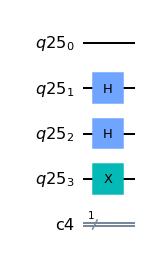

In [61]:
# load b vector in |b> state. As |b>=|1>
hhl.x(q[3])

# put the qubits of |psi> in uniform superposition
hhl.h(q[1])
hhl.h(q[2])

hhl.draw('mpl')

In [62]:
amplitudes = get_amplitudes(hhl)
assert np.allclose(amplitudes, np.array([0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
       0. +0.j, 0.5+0.j, 0. +0.j, 0.5+0.j, 0. +0.j, 0.5+0.j, 0. +0.j, 0.5+0.j, 0. +0.j]))

**Exercise 2** (2 points). Start the quantum phase estimation by applying $C-U^{2^0}$ and $C-U^{2^1}$. Extend the circuit with the two appropriate gates.

$ RZ(\lambda)  = exp(-i\frac{\lambda}{2}Z)$ ->\
$ U = RZ(-\pi)$

In [63]:
from scipy.linalg import expm  

In [75]:
expm(  2*np.pi * 1j*np.array([[1,0],[0,-1]]))

array([[1.-2.4492936e-16j, 0.-0.0000000e+00j],
       [0.-0.0000000e+00j, 1.+2.4492936e-16j]])

In [65]:
from qiskit.quantum_info.operators import Operator

In [73]:
Operator(qiskit.circuit.library.RZGate(2*np.pi))

Operator([[-1.-1.2246468e-16j,  0.+0.0000000e+00j],
          [ 0.+0.0000000e+00j, -1.+1.2246468e-16j]],
         input_dims=(2,), output_dims=(2,))

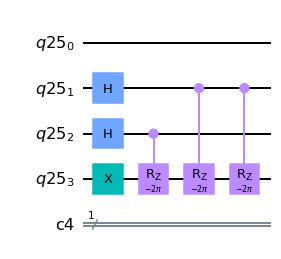

In [67]:
hhl.crz(-2*np.pi,q[2],q[3])

# The controlled-U2 operator is a simple crz gate
hhl.crz(-2*np.pi,q[1],q[3])
hhl.crz(-2*np.pi,q[1],q[3])
hhl.draw('mpl')

In [68]:
amplitudes = get_amplitudes(hhl)
assert np.allclose(amplitudes, np.array([ 0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,
                                          0. +0.j,  0. +0.j,  0.5+0.j,  0. +0.j,  0.5+0.j,  0. +0.j,
                                         -0.5+0.j,  0. +0.j, -0.5+0.j,  0. +0.j]))

In [69]:
np.round(amplitudes.data,4)

array([ 0. +0.j,  0. +0.j,  0. -0.j,  0. +0.j, -0. +0.j,  0. +0.j,
       -0. +0.j,  0. +0.j,  0.5+0.j,  0. +0.j,  0.5+0.j,  0. +0.j,
       -0.5-0.j,  0. +0.j, -0.5-0.j,  0. +0.j])

**Exercise 3** (1 point). Apply the quantum inverse Fourier transformation. Don't forget the swap just before the transformation.

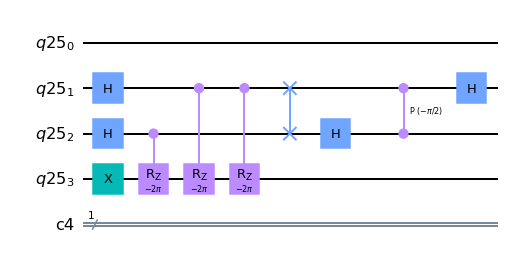

In [76]:
hhl.swap(q[1], q[2])
hhl.h(q[2])
hhl.cp(-np.pi/ 2, q[1], q[2])
hhl.h(q[1])

hhl.draw('mpl')

In [77]:
amplitudes = get_amplitudes(hhl)
assert np.allclose(amplitudes, np.array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
                                         0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]))

**Exercise 4** (1 point). After this step, swap the eigenvalue registers again (this time to perform the inversion) and apply the controlled rotation. Use the same angle as in the lecture notebook.

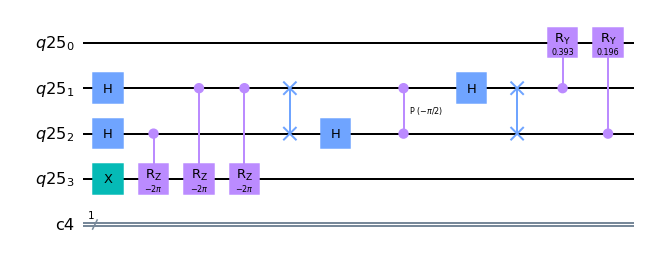

In [81]:
hhl.swap(q[1], q[2])

# apply a controlled rotation over pi/8 on the most significant bit of the eigenvalue register 
hhl.cry(0.392699, q[1], q[0])

# apply a controlled rotation over pi/16 on the most significant bit of the eigenvalue register 
hhl.cry(0.19634955, q[2], q[0])

hhl.draw('mpl')

In [82]:
amplitudes = get_amplitudes(hhl)
assert np.allclose(amplitudes, np.array([0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
                                         0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
                                         0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
                                         0.99518473+0.j, 0.09801714+0.j, 0.        +0.j, 0.        +0.j]))

**Exercise 5** (2 points). Uncompute the eigenvalue register

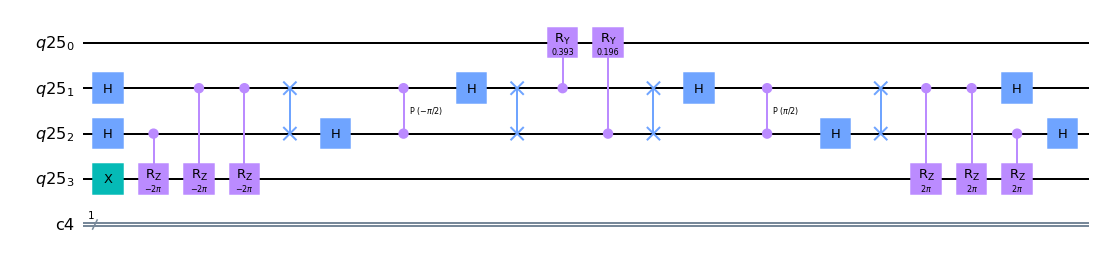

In [83]:
hhl.swap(q[1], q[2])
hhl.h(q[1])
hhl.cp(np.pi / 2, q[1], q[2])
hhl.h(q[2])
hhl.swap(q[2], q[1])

# Apply the inverse Controlled-U2 (actually the gate is its own inverse)
hhl.crz(2*np.pi,q[1], q[3])
hhl.crz(2*np.pi,q[1], q[3])
hhl.crz(2*np.pi,q[2], q[3])

# Bring the eigenvalue register back to its |00> state
hhl.h(q[2])
hhl.h(q[1])

hhl.draw('mpl')

In [84]:
amplitudes

Statevector([ 1.93022864e-33+7.49879891e-33j,
             -3.58635797e-34-1.68336617e-49j,
             -5.48358618e-33+5.54848130e-33j,
             -1.21587779e-33+9.78536405e-34j,
              6.09374895e-17-1.86567254e-32j,
              6.00181914e-18-1.83752715e-33j,
              5.42585050e-33+5.33800434e-33j,
              1.51767078e-33+1.74750846e-33j,
             -1.89343110e-17+4.30548353e-33j,
             -9.39433768e-19+2.26068417e-33j,
              3.29810557e-17-2.70747225e-17j,
              7.78582170e-18-4.16001277e-18j,
              9.95184726e-01+6.09374895e-17j,
              9.80171449e-02+6.00181914e-18j,
             -2.65365977e-17-3.20590989e-17j,
             -6.79376817e-18-1.09810398e-17j],
            dims=(2, 2, 2, 2))


In [85]:
amplitudes = get_amplitudes(hhl)
assert np.allclose(amplitudes, np.array([0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
                                         0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
                                         0.99518473+0.j, 0.09801714+0.j, 0.        +0.j, 0.        +0.j,
                                         0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j]))

At this point, if we measure 1 in the ancilla (qubit 0), the state will be proportional to $A^{-1}b = \sum_j \beta_j\lambda_j^{-1}\left|u_j\right\rangle=0 \frac{1}{1} |0\rangle + 1 \frac{1}{-1} |1\rangle=-|1\rangle$.

In [93]:
from qiskit import BasicAer

In [102]:

#measure the ancilla |a'>
hhl.measure(q[3],c[0])


shots = 30000
backend = Aer.get_backend('qasm_simulator')
job = execute(hhl, backend, shots=shots)
result = job.result()
counts = result.get_counts(hhl)

# x0 = np.sqrt(counts['0']/shots)*16/np.pi  <--- there is none
x0 = 0
x1 = np.sqrt(counts['1']/shots)

print('x = ', x0, '|0> +/-', x1, '|1>')

x =  0 |0> +/- 1.0 |1>
